<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. 

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
# Get your import statement here

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics
import scipy.stats
import statsmodels.api as sm

In [2]:
# Load your dataset here

data = pd.read_csv(r"dataset/nyc-rolling-sales.csv")
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Write your syntax here
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also view the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# Write your syntax here
data.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# Write your syntax here
data.shape

(84548, 22)

Based on the result above, we can see that this dataset contains 84548 data and 22 features.

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [6]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function

data.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace = True)
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Let's view Dtype of each features in dataframe using `.info()` function.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

Based on the result above, we can see that we get 9 numerical data and 10 categorical data. For the missing value, it looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [8]:
#First, let's check which columns should be categorical
print('Column name')
for col in data.columns:
    if data[col].dtype=='object':
        print(col, data[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [9]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    data[col] = pd.to_numeric(data[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    data[col] = data[col].astype('category')

data['SALE DATE'] = pd.to_datetime(data['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [10]:
data.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [11]:
missing = data.isnull().sum()/len(data)*100

print(pd.DataFrame([missing[missing>0],pd.Series(data.isnull().sum()[data.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [12]:
print(data[(data['LAND SQUARE FEET'].isnull()) & (data['GROSS SQUARE FEET'].notnull())].shape)
print(data[(data['LAND SQUARE FEET'].notnull()) & (data['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1366+6=1372 rows that can be filled in with their approximate values.

In [13]:
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].mask((data['LAND SQUARE FEET'].isnull()) & (data['GROSS SQUARE FEET'].notnull()), data['GROSS SQUARE FEET'])
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].mask((data['LAND SQUARE FEET'].notnull()) & (data['GROSS SQUARE FEET'].isnull()), data['LAND SQUARE FEET'])

In [14]:
data[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].isnull().sum()

LAND SQUARE FEET     26246
GROSS SQUARE FEET    26246
SALE PRICE           14561
dtype: int64

Numbers of missing values for LAND SF and GROSS SF features are each 26246 and for SALE PRICE feature is 14561. Now, let's check whether this dataframe contains duplicate value.

In [15]:
#  Check for duplicates before

print(sum(data.duplicated()))

data[data.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# data.duplicated() automatically excludes duplicates, to keep duplicates in data we use keep=False

# in data.duplicated(data.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

In [16]:
data.drop_duplicates(inplace=True)

print(sum(data.duplicated()))

0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  int64         
 1   NEIGHBORHOOD                    83783 non-null  category      
 2   BUILDING CLASS CATEGORY         83783 non-null  category      
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  category      
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

The duplicate data has been removed. Now, lets handle the missing values.

In [18]:
data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean(), inplace=True)
data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean(), inplace=True)
data['SALE PRICE'].fillna(data['SALE PRICE'].mean(), inplace=True)

In [19]:
data[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].isnull().sum()

LAND SQUARE FEET     0
GROSS SQUARE FEET    0
SALE PRICE           0
dtype: int64

The missing values in LAND SF, GROSS SF, and SALE PRICE have been replaced by each of feature's mean.

In [20]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.280703e+06,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.280703e+06,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17


In [21]:
data['RESIDENTIAL UNITS'].value_counts()

1      34465
0      24546
2      15918
3       4566
4       1334
       ...  
420        1
165        1
550        1
168        1
283        1
Name: RESIDENTIAL UNITS, Length: 176, dtype: int64

## Exploratory Data Analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [22]:
data[data['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,7.877700e+04,7.877700e+04,78777.000000,7.877700e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.376817e+03,3.206997e+03,1781.065451,1.042932e+06
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.398523e+04,2.285829e+04,551.024570,3.040623e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,2.000000e+03,1.300000e+03,1920.000000,3.012000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,3.250000e+03,2.366000e+03,1940.000000,6.530000e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.857326e+03,4.206654e+03,1967.000000,1.280703e+06
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [23]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
data[data['RESIDENTIAL UNITS']==0].describe()
# Graded-Funtion End

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,2.454600e+04,2.454600e+04,24546.000000,2.454600e+04
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,5.235378e+03,6.012252e+03,1675.525788,1.579393e+06
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,5.001026e+04,4.914911e+04,679.095000,1.815253e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,2.021000e+03,6.950000e+01,1921.000000,2.170000e+05
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,3.857326e+03,4.206654e+03,1950.000000,5.200000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.857326e+03,4.206654e+03,1962.000000,1.280703e+06
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


Write your findings below:

$\alpha^2$ = 0.05

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [24]:
# Write your syntax below

data['BOROUGH'].value_counts()

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [25]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
data.groupby('BOROUGH').mean()
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,1107.657938,749.190421,9912.565960,2.276931,0.280521,2.597227,4033.697980,7007.159433,1706.536902,2.919586e+06
2,4202.934372,298.625679,10360.980841,3.343580,0.160280,3.510152,3909.012725,4489.147412,1750.578067,5.946771e+05
3,4317.583484,339.525228,11072.688210,2.011618,0.145451,2.194229,2016.057333,2481.756365,1767.130185,8.410834e+05
4,6630.747589,230.493672,11300.423572,1.687283,0.190410,1.908920,4129.676832,3631.925115,1852.259982,9.049718e+05
5,3261.786162,198.775554,10047.136090,1.230111,0.080400,1.313163,7849.230260,4654.350216,1869.968177,7.488526e+05


Based on the result above, we know the mean for each features that grouped by borough.

From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [26]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
data.groupby('BOROUGH').median()
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,1170.0,1004.0,10022.0,0.0,0.0,1.0,3857.326255,4206.653514,1937.0,1.280703e+06
2,4177.5,47.0,10465.0,1.0,0.0,1.0,2375.000000,1764.000000,1932.0,2.748970e+05
3,4558.0,50.0,11219.0,1.0,0.0,1.0,1800.000000,1520.000000,1930.0,4.256050e+05
4,5900.0,40.0,11375.0,1.0,0.0,1.0,3857.326255,2376.000000,1945.0,7.400000e+05
5,3024.0,56.0,10308.0,1.0,0.0,1.0,3857.326255,1781.500000,1973.0,5.600000e+05


Based on the result above, we know the median for each features that grouped by borough.

From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [27]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
data.groupby('BOROUGH').apply(pd.DataFrame.mode).reset_index(drop=True)
# Graded-Funtion End

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,16,1,R4,169 WEST 95TH STREET,,10011,0,0,1,3857.326255,4206.653514,0,2,R4,1.280703e+06,2017-08-07
1,2,RIVERDALE,02 TWO FAMILY DWELLINGS,1,3944,1,D4,2287 JOHNSON AVENUE,,10462,1,0,1,0.000000,0.000000,0,1,D4,0.000000e+00,2017-06-29
2,3,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,2135,1,R4,429 KENT AVENUE,,11201,1,0,1,0.000000,0.000000,0,1,R4,0.000000e+00,2016-10-06
3,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,A1,131-05 40TH ROAD,,11354,1,0,1,3857.326255,4206.653514,1920,1,A1,1.280703e+06,2016-11-10
4,5,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,2450,1,A5,1235 FOREST HILL ROAD,,10314,1,0,1,3857.326255,4206.653514,1970,1,A5,1.280703e+06,2017-03-01


Based on the result above, we know the mode for each features that grouped by borough.

From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [28]:
data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,8.378300e+04,8.378300e+04,83783.000000,8.378300e+04
mean,2.999308,4242.903155,376.137415,10733.236575,1.999976,0.183677,2.213504,3.857326e+03,4.206654e+03,1789.814318,1.280703e+06
std,1.288668,3568.789482,658.021286,1289.764300,16.569118,8.576582,18.777727,3.448846e+04,3.494519e+04,536.565051,1.041857e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1326.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,2.000000e+03,1.342000e+03,1920.000000,3.000000e+05
50%,3.000000,3319.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,3.194000e+03,2.480000e+03,1940.000000,6.700000e+05
75%,4.000000,6295.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.857326e+03,4.206654e+03,1965.000000,1.280703e+06
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


In [29]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
numer_data = ['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
     'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']
borough_data = [1, 2, 3, 4, 5]

for i in borough_data:
    print(i)
    for j in numer_data:
        print(j, np.ptp(data[data['BOROUGH']==i][j]))

# Graded-Funtion End

1
BLOCK 2243
LOT 9105
ZIP CODE 10463
RESIDENTIAL UNITS 1641
COMMERCIAL UNITS 422
TOTAL UNITS 1653
LAND SQUARE FEET 363912.0
GROSS SQUARE FEET 2155404.0
YEAR BUILT 2017
SALE PRICE 2209999999.0
2
BLOCK 3692
LOT 5360
ZIP CODE 10803
RESIDENTIAL UNITS 948
COMMERCIAL UNITS 22
TOTAL UNITS 955
LAND SQUARE FEET 679000.0
GROSS SQUARE FEET 1303935.0
YEAR BUILT 2017
SALE PRICE 110000000.0
3
BLOCK 8954
LOT 9008
ZIP CODE 11249
RESIDENTIAL UNITS 889
COMMERCIAL UNITS 184
TOTAL UNITS 889
LAND SQUARE FEET 970000.0
GROSS SQUARE FEET 1330743.0
YEAR BUILT 2017
SALE PRICE 345000000.0
4
BLOCK 16309
LOT 8008
ZIP CODE 11694
RESIDENTIAL UNITS 1844
COMMERCIAL UNITS 2261
TOTAL UNITS 2261
LAND SQUARE FEET 4228293.0
GROSS SQUARE FEET 3750558.0
YEAR BUILT 2017
SALE PRICE 257499999.0
5
BLOCK 8049
LOT 5356
ZIP CODE 10314
RESIDENTIAL UNITS 143
COMMERCIAL UNITS 126
TOTAL UNITS 143
LAND SQUARE FEET 4252225.0
GROSS SQUARE FEET 4252225.0
YEAR BUILT 2016
SALE PRICE 121999999.0


From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [30]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
data.groupby('BOROUGH').var()
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,2.886372e+05,776690.497576,1.165824e+06,496.366872,39.571488,542.115484,2.714779e+07,1.371910e+09,420464.577474,4.634363e+14
2,1.116755e+06,574149.535826,1.069825e+06,498.684024,0.771532,514.454709,3.375209e+08,8.683572e+08,340594.440137,7.803693e+12
3,7.335413e+06,285379.149550,1.636403e+06,72.958719,2.704118,75.818955,7.882877e+07,2.210455e+08,313687.756141,1.561761e+13
4,1.872519e+07,243622.537761,8.162344e+05,328.621156,201.281217,535.806222,1.397220e+09,1.160883e+09,180710.056112,7.285544e+12
5,5.377588e+06,182550.857153,2.621956e+06,5.327995,3.972920,9.165570,6.945886e+09,4.230782e+09,186468.092538,2.729078e+12


Based on the result above, we know the variance for each features that grouped by borough.

From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [31]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
data.groupby('BOROUGH').std()
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,537.249675,881.300458,1079.733231,22.279292,6.290587,23.283374,5210.353980,37039.305339,648.432400,2.152757e+07
2,1056.766385,757.726557,1034.323430,22.331234,0.878369,22.681594,18371.742462,29467.900592,583.604695,2.793509e+06
3,2708.396811,534.208901,1279.219844,8.541588,1.644420,8.707408,8878.556905,14867.597573,560.078348,3.951912e+06
4,4327.260807,493.581339,903.456927,18.127911,14.187361,23.147488,37379.410300,34071.736579,425.100054,2.699175e+06
5,2318.962697,427.259707,1619.245590,2.308245,1.993219,3.027469,83341.984776,65044.462053,431.819514,1.651992e+06


Based on the result above, we know the deviation standard for each feature that grouped by borough.

Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

In [32]:
data_wnull = data.loc[(data['SALE PRICE']!=0) & (data['SALE PRICE']<0.3e9)]

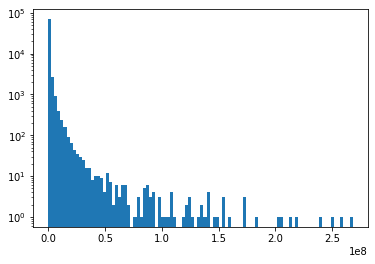

In [33]:
# Write your function below

# Graded-Funtion Begin
plt.hist(np.array(data_wnull['SALE PRICE']), bins=100, log=True);
# Graded-Funtion End

Based on the histogram above, we can see that the data is right-skewed. The distribution is normal (half-curved). 

<AxesSubplot:title={'center':'SALE PRICE'}, xlabel='[BOROUGH]'>

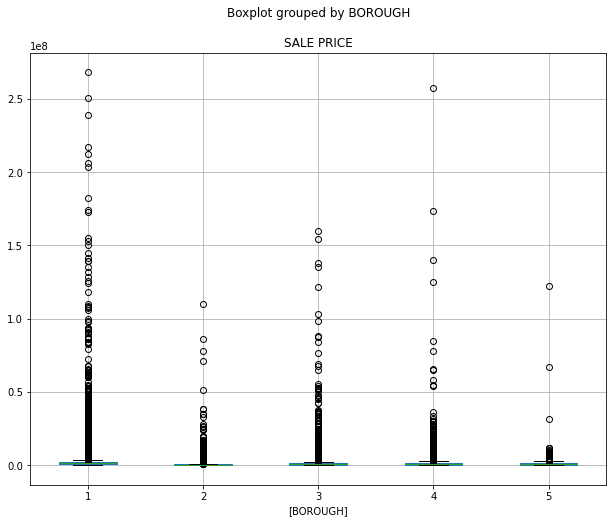

In [34]:
data_wnull.boxplot(
    column = ['SALE PRICE'], by=['BOROUGH'], figsize=(10,8)
)

Based on the boxplot above, we can see that the dataframe contains many outliers.

Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [35]:
data.groupby('BOROUGH').agg({"SALE PRICE": [np.mean, np.std, np.size]})

SALE PRICE                       
                 mean           std     size
BOROUGH                                     
1        2.919586e+06  2.152757e+07  18102.0
2        5.946771e+05  2.793509e+06   6994.0
3        8.410834e+05  3.951912e+06  23843.0
4        9.049718e+05  2.699175e+06  26548.0
5        7.488526e+05  1.651992e+06   8296.0

Based on the result above, we can get the following values

In [36]:
mean_mht = 2919586
sd_mht = 21527570
n = 18102
z = 1.96

In [37]:
se = sd_mht / np.sqrt(n)
print(se)

160004.32786533292


In [38]:
lower = mean_mht - z*se
upper = mean_mht + z*se

In [39]:
print("(",lower,",",upper,")")

( 2605977.5173839475 , 3233194.4826160525 )


It means, the true mean of the sales price in manhattan will fall between 2605977.5 and 3233194.4.

Let's set the hypothesis below: \
$H_0$ : The mean sale price in Manhattan is the same with the mean sale price in Brooklyn. \
$H_1$ : The mean sale price in Manhattan is not the same with the mean sale price in Brooklyn.

Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [40]:
manhattan = data[data["BOROUGH"] == 1]
brooklyn = data[data["BOROUGH"] == 3]

In [41]:
n_mht = len(manhattan)
mu_mht = manhattan["SALE PRICE"].mean()
sd_mht = manhattan["SALE PRICE"].std()
(n_mht, mu_mht, sd_mht)

(18102, 2919585.937417379, 21527570.45130265)

In [42]:
n_br = len(brooklyn)
mu_br = brooklyn["SALE PRICE"].mean()
sd_br = brooklyn["SALE PRICE"].std()
(n_br, mu_br, sd_br)

(23843, 841083.3950845111, 3951911.835186454)

In [43]:
# Write your function below

# Graded-Funtion Begin

sm.stats.ztest(manhattan["SALE PRICE"].dropna(),
               brooklyn["SALE PRICE"].dropna(),
              alternative='two-sided')

# Graded-Funtion End

(14.588368231868914, 3.330691448877587e-48)

We get a very small value for p-value (3.33e-48), so that we can reject the null hypothesis that said the mean sale price in Manhattan is the same with the mean sale price in Brooklyn.

Write your final conclusion below.

Your conclusion below are graded. (1 Points)

- The true mean of the sales price in Manhattan will fall between 2605977.5 and 3233194.4 (USD)
- For the hypothesis that has been set and hypothesis testing that has been conducted, we get a very small value for p-value (3.33e-48), so that we can reject the null hypothesis that said the mean sale price in Manhattan is the same with the mean sale price in Brooklyn.